          Month        Peak       Gain  % Gain     Average Avg % Gain  \
0  Last 30 days  40,490,922   -748,958  -1.80%  29,034,233     -1.40%   
1        Mar-25  41,239,880  1,315,803   3.30%  29,432,249      1.50%   
2        Feb-25  39,924,077    582,056   1.50%  29,005,674     -0.50%   
3        Jan-25  39,342,021     22,389   0.10%  29,156,757      1.00%   
4        Dec-24  39,319,632  1,048,352   2.70%  28,859,638      5.10%   

  In-Game Peak  
0   12,514,434  
1   13,194,690  
2   12,288,438  
3   12,485,275  
4   12,517,653  


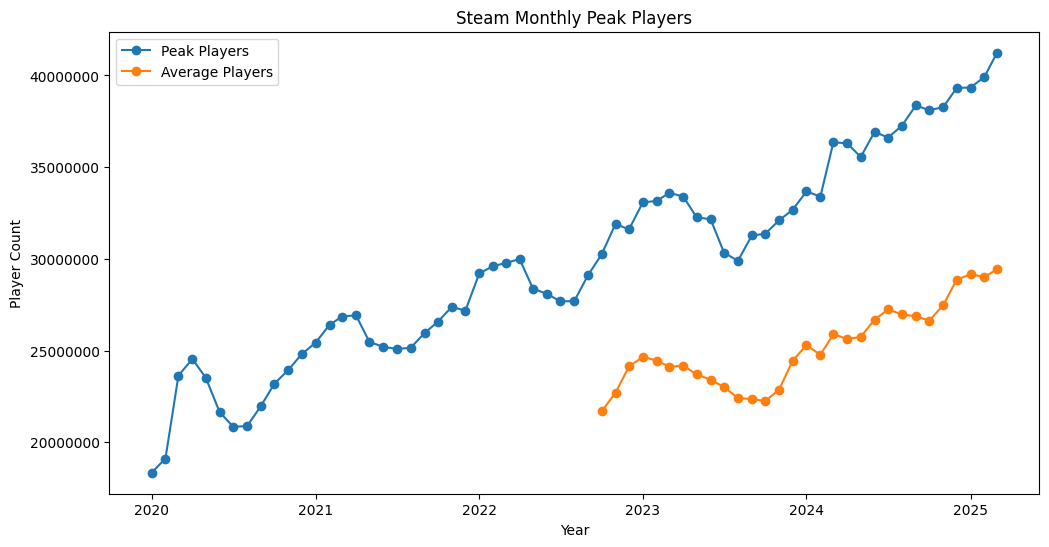

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df1=pd.read_csv('SteamPlayers.csv')

#removes the first row
df1=df1[df1['Month'] != 'Last 30 days']
#makes the months actual dates
df1['Month']=pd.to_datetime(df1['Month'], format='%b-%y')

#removes commas from numbers and turns them into float
df1['Peak']=df1['Peak'].str.replace(',','').astype(float)
df1['Average']=df1['Average'].str.replace(',', '').astype(float)
#Sorts date from newest to oldest
df1=df1.sort_values('Month')

# Create the plot
plt.figure(figsize=(12, 6))

plt.title('Steam Monthly Peak Players')
plt.ylabel('Player Count')
plt.xlabel('Year')
plt.plot(df1['Month'],df1['Peak'],marker='o',label='Peak Players')
plt.plot(df1['Month'],df1['Average'],marker='o',label='Average Players')
#makes y-axis labels real numbers
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()